<a href="https://www.kaggle.com/code/rajatraj0502/fooddata-central?scriptVersionId=173570954" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fooddata-central/fda_approved_food_items_w_nutrient_info.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame to preview its contents
csv_path = os.path.join('/kaggle/input/fooddata-central/fda_approved_food_items_w_nutrient_info.csv')
food_data = pd.read_csv(csv_path)

# Display the first few rows and the DataFrame info to understand its structure and content
food_data.head(), food_data.info()


/tmp/ipykernel_18/1584612936.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  food_data = pd.read_csv(csv_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841897 entries, 0 to 1841896
Data columns (total 45 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   fdc_id                                       int64  
 1   brand_owner                                  object 
 2   description                                  object 
 3   ingredients                                  object 
 4   gtin_upc                                     object 
 5   serving_size                                 float64
 6   serving_size_unit                            object 
 7   branded_food_category                        object 
 8   modified_date                                object 
 9   available_date                               object 
 10  Calcium, Ca-MG                               float64
 11  Carbohydrate, by difference-G                float64
 12  Cholesterol-MG                               float64
 13  Copper, Cu-M

(    fdc_id                               brand_owner  \
 0  1105904  Richardson Oilseed Products (US) Limited   
 1  1105905                     CAMPBELL SOUP COMPANY   
 2  1105906                     CAMPBELL SOUP COMPANY   
 3  1105907                     CAMPBELL SOUP COMPANY   
 4  1105908                     CAMPBELL SOUP COMPANY   
 
                                    description  \
 0                   WESSON Vegetable Oil 1 GAL   
 1                           SWANSON BROTH BEEF   
 2     CAMPBELL'S SLOW KETTLE SOUP CLAM CHOWDER   
 3  CAMPBELL'S SLOW KETTLE SOUP CHEESE BROCCOLI   
 4                        SWANSON BROTH CHICKEN   
 
                                          ingredients     gtin_upc  \
 0                                      Vegetable Oil  27000612323   
 1  INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2%...  51000198808   
 2  INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREA...  51000213273   
 3  INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, V...  51000213303  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841897 entries, 0 to 1841896
Data columns (total 45 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   fdc_id                                       int64  
 1   brand_owner                                  object 
 2   description                                  object 
 3   ingredients                                  object 
 4   gtin_upc                                     object 
 5   serving_size                                 float64
 6   serving_size_unit                            object 
 7   branded_food_category                        object 
 8   modified_date                                object 
 9   available_date                               object 
 10  Calcium, Ca-MG                               float64
 11  Carbohydrate, by difference-G                float64
 12  Cholesterol-MG                               float64
 13  Copper, Cu-M

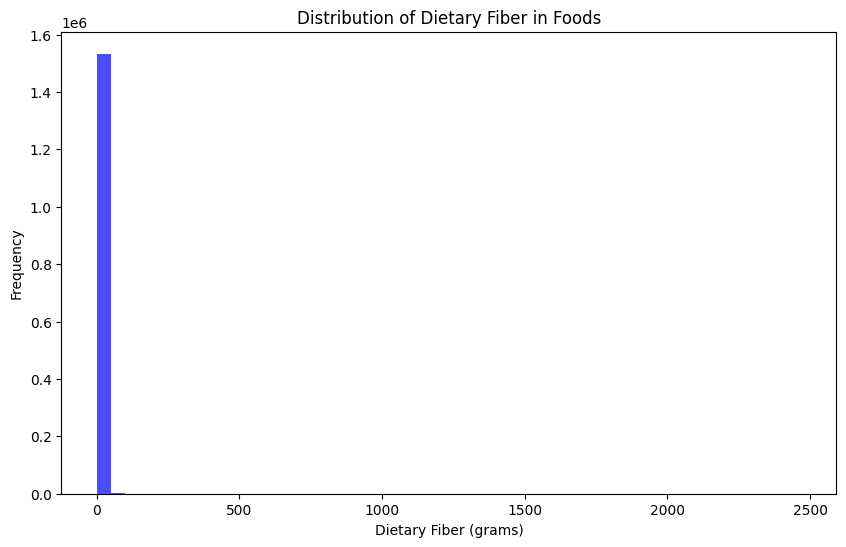

Correlation matrix:
                                Fiber, total dietary-G  \
Fiber, total dietary-G                        1.000000   
Sugars, total including NLEA-G                0.138486   
Total lipid (fat)-G                           0.232162   
Protein-G                                     0.356366   

                                Sugars, total including NLEA-G  \
Fiber, total dietary-G                                0.138486   
Sugars, total including NLEA-G                        1.000000   
Total lipid (fat)-G                                   0.141127   
Protein-G                                             0.078794   

                                Total lipid (fat)-G  Protein-G  
Fiber, total dietary-G                     0.232162   0.356366  
Sugars, total including NLEA-G             0.141127   0.078794  
Total lipid (fat)-G                        1.000000   0.325010  
Protein-G                                  0.325010   1.000000  


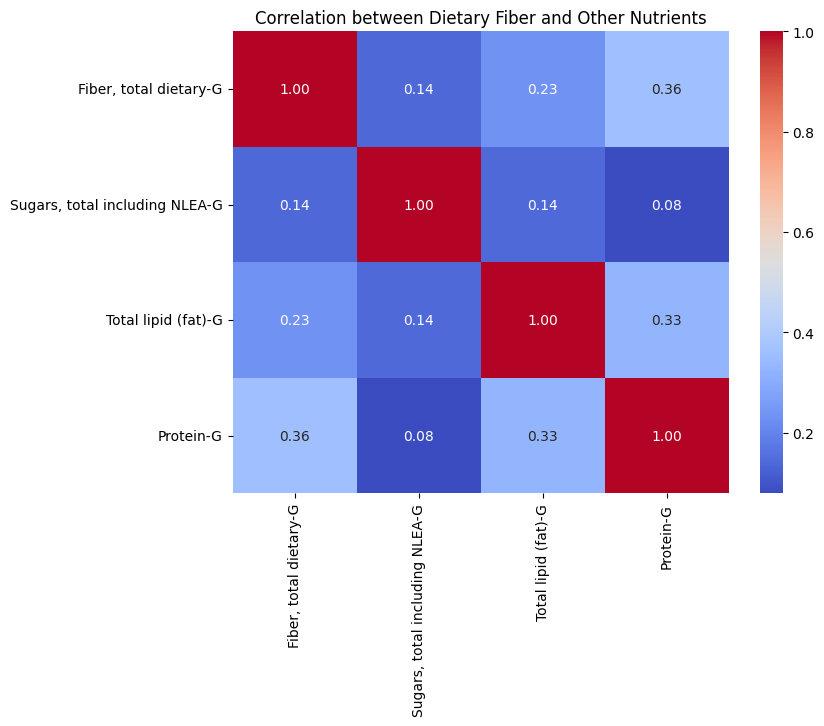

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Assuming you've already set 'csv_path' to the path of your CSV file
food_data = pd.read_csv(csv_path, low_memory=False)

# Display basic info about DataFrame
print(food_data.info())

# Check the columns available especially those related to dietary fiber
print(food_data.columns)

# Let's focus on total dietary fiber and possibly other nutrients
# Display the top 10 food items with the highest dietary fiber content
high_fiber_foods = food_data.sort_values(by='Fiber, total dietary-G', ascending=False).head(10)
print("Top 10 high fiber foods:")
print(high_fiber_foods[['description', 'Fiber, total dietary-G', 'serving_size', 'serving_size_unit', 'brand_owner']])

# Analyze the distribution of fiber in foods
import matplotlib.pyplot as plt

# Plot a histogram of the dietary fiber content
plt.figure(figsize=(10, 6))
plt.hist(food_data['Fiber, total dietary-G'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Dietary Fiber in Foods')
plt.xlabel('Dietary Fiber (grams)')
plt.ylabel('Frequency')
plt.show()

# It might also be interesting to check correlation with other nutrients, like sugars or fats
# For example, here's how you could check for a correlation matrix including some relevant nutrients
important_nutrients = food_data[['Fiber, total dietary-G', 'Sugars, total including NLEA-G', 'Total lipid (fat)-G', 'Protein-G']]
correlation_matrix = important_nutrients.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Dietary Fiber and Other Nutrients')
plt.show()


Average fiber content by category:
branded_food_category
Vegetables - Prepared/Processed (Shelf Stable)       81.985000
Vegetables - Prepared/Processed (Frozen)             62.500000
Ayurvedic Supplements                                50.000000
Digestive & Fiber Supplements                        41.563934
Antioxidant Supplements                              34.466667
Nuts/Seeds  Unprepared/Unprocessed (Shelf Stable)    30.000000
Children's Natural Remedies                          28.466667
Fruits, Vegetables & Produce                         22.746667
Grains/Cereal - Ready to Eat - (Shelf Stable)        22.450000
Green Supplements                                    21.028421
Name: Fiber, total dietary-G, dtype: float64
Category averages for selected nutrients:
                                                   Fiber, total dietary-G  \
branded_food_category                                                       
Vegetables - Prepared/Processed (Shelf Stable)                  81.98500

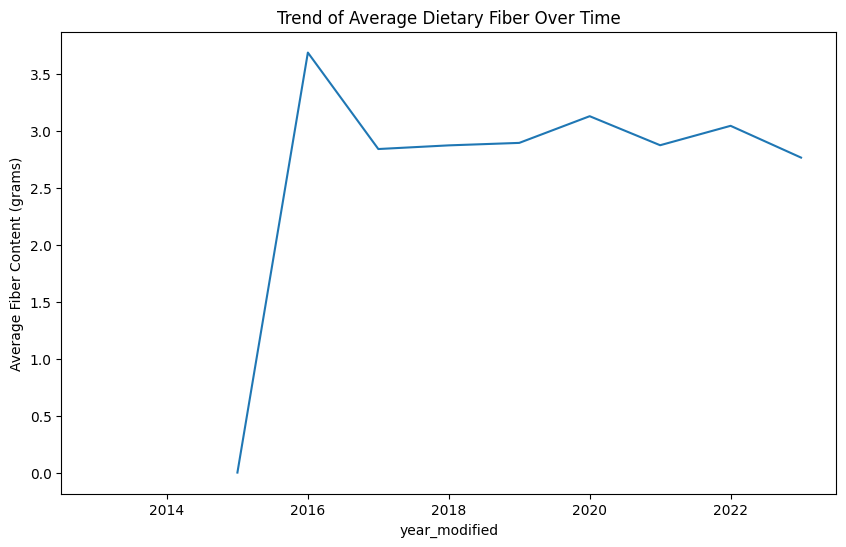

Missing values in fiber column: 306839


In [4]:
# 1. Identify Food Categories High in Fiber
average_fiber_by_category = food_data.groupby('branded_food_category')['Fiber, total dietary-G'].mean().sort_values(ascending=False)
print("Average fiber content by category:")
print(average_fiber_by_category.head(10))  # Display top 10 categories

# 2. Comparative Analysis Across Nutrients
# Let's add a few more nutrients to compare
nutrient_comparison = food_data[['branded_food_category', 'Fiber, total dietary-G', 'Protein-G', 'Total lipid (fat)-G', 'Sugars, total including NLEA-G']]
category_averages = nutrient_comparison.groupby('branded_food_category').mean().sort_values(by='Fiber, total dietary-G', ascending=False)
print("Category averages for selected nutrients:")
print(category_averages.head(10))

# 3. Trend Analysis Over Time (assuming 'modified_date' can be parsed as a date)
food_data['year_modified'] = pd.to_datetime(food_data['modified_date']).dt.year
fiber_trends = food_data.groupby('year_modified')['Fiber, total dietary-G'].mean()
plt.figure(figsize=(10, 6))
fiber_trends.plot(title='Trend of Average Dietary Fiber Over Time')
plt.ylabel('Average Fiber Content (grams)')
plt.show()

# 4. Data Cleaning and Preparation
# Check for missing values in important columns
print("Missing values in fiber column:", food_data['Fiber, total dietary-G'].isnull().sum())
# Fill missing values with the mean or median as appropriate (example shown for mean)
food_data['Fiber, total dietary-G'] = food_data['Fiber, total dietary-G'].fillna(food_data['Fiber, total dietary-G'].mean())

# Remove outliers - example using the z-score for Fiber content
from scipy.stats import zscore
food_data['fiber_zscore'] = zscore(food_data['Fiber, total dietary-G'])
food_data = food_data[food_data['fiber_zscore'].abs() <= 3]  # Keeping only entries within 3 standard deviations


/tmp/ipykernel_18/2948390663.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  food_data['Fiber, total dietary-G'].fillna(median_fiber, inplace=True)


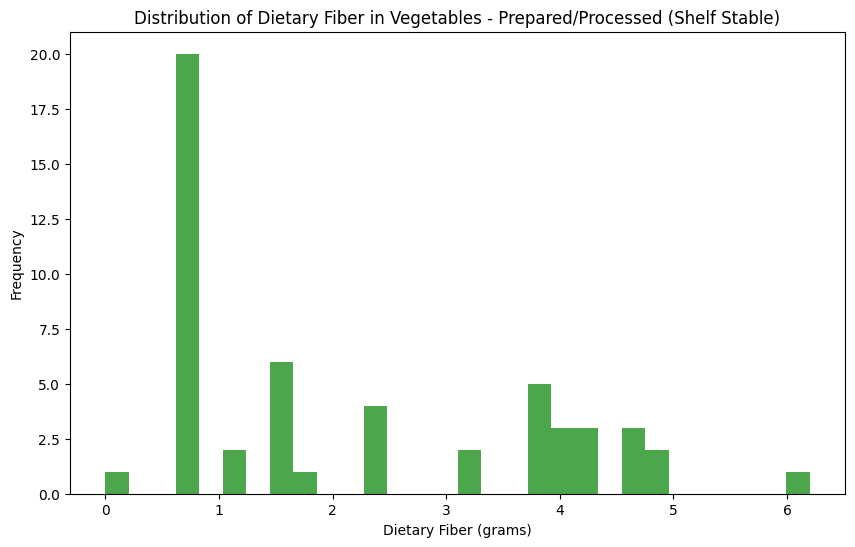

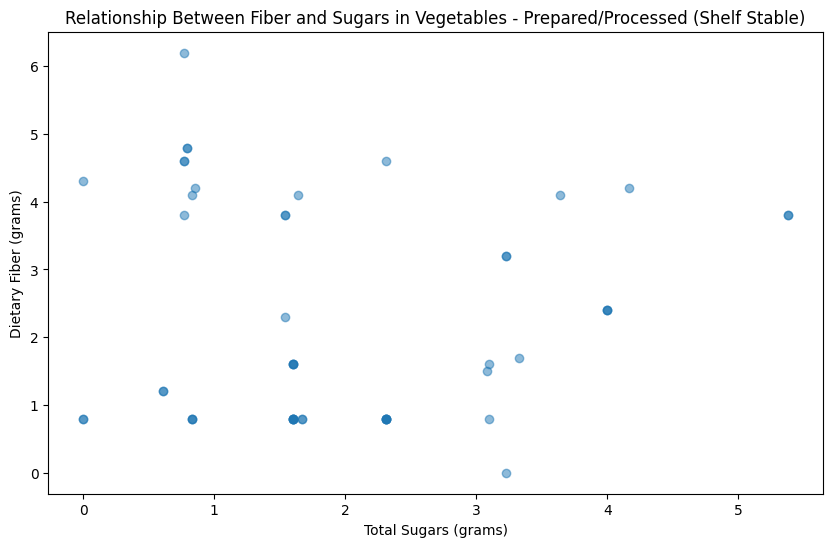

In [5]:
# Handling missing values in the fiber column
median_fiber = food_data['Fiber, total dietary-G'].median()
food_data['Fiber, total dietary-G'].fillna(median_fiber, inplace=True)

# Exploring a specific category in detail
specific_category = 'Vegetables - Prepared/Processed (Shelf Stable)'
category_data = food_data[food_data['branded_food_category'] == specific_category]
plt.figure(figsize=(10, 6))
plt.hist(category_data['Fiber, total dietary-G'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Dietary Fiber in ' + specific_category)
plt.xlabel('Dietary Fiber (grams)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to examine the relationship between fiber and sugars within the high fiber categories
plt.figure(figsize=(10, 6))
plt.scatter(category_data['Sugars, total including NLEA-G'], category_data['Fiber, total dietary-G'], alpha=0.5)
plt.title('Relationship Between Fiber and Sugars in ' + specific_category)
plt.xlabel('Total Sugars (grams)')
plt.ylabel('Dietary Fiber (grams)')
plt.show()


<Figure size 1200x800 with 0 Axes>

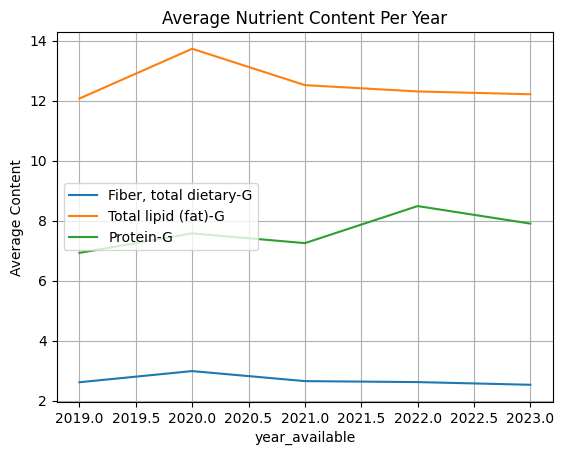

<Figure size 1200x800 with 0 Axes>

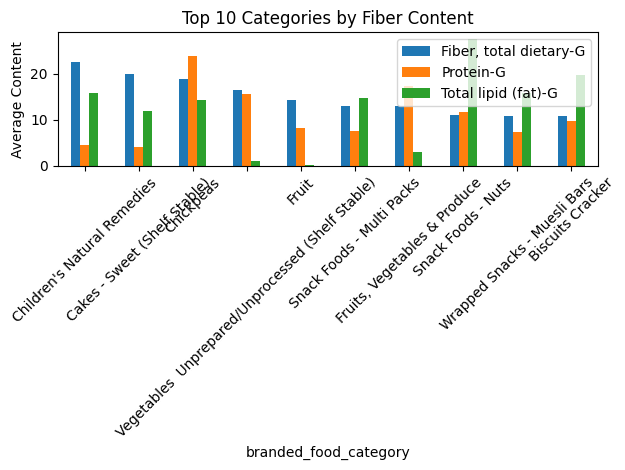

In [6]:
# Temporal Analysis of Nutrient Changes
food_data['year_available'] = pd.to_datetime(food_data['available_date']).dt.year
avg_nutrients_per_year = food_data.groupby('year_available')[['Fiber, total dietary-G', 'Total lipid (fat)-G', 'Protein-G']].mean()

plt.figure(figsize=(12, 8))
avg_nutrients_per_year.plot(title='Average Nutrient Content Per Year')
plt.ylabel('Average Content')
plt.grid(True)
plt.show()

# Comparative Analysis Between Categories
pivot_table = food_data.pivot_table(index='branded_food_category', values=['Fiber, total dietary-G', 'Protein-G', 'Total lipid (fat)-G'], aggfunc='mean')
pivot_table = pivot_table.sort_values(by='Fiber, total dietary-G', ascending=False)

plt.figure(figsize=(12, 8))
pivot_table.head(10).plot(kind='bar', title='Top 10 Categories by Fiber Content')
plt.ylabel('Average Content')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Fiber, total dietary-G   Protein-G  Total lipid (fat)-G
Cluster                                                         
0                      2.959533    6.954230            42.796306
1                      1.766078    3.631618             5.021261
2                     10.001581   13.573809            21.277174
3                      0.683235   24.168913            18.132005
4                      1.097616  720.425263           819.791228


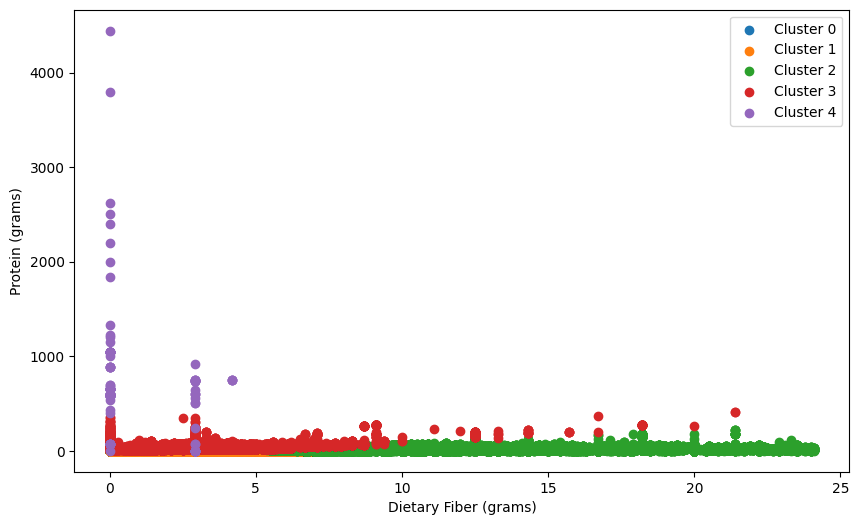

In [7]:
from sklearn.cluster import KMeans
import numpy as np

# Prepare the data (dropping NA values for this analysis)
data_for_clustering = food_data[['Fiber, total dietary-G', 'Protein-G', 'Total lipid (fat)-G']].dropna()

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(scaled_data)
clusters = kmeans.labels_

# Add clusters back to the dataset for analysis
data_for_clustering['Cluster'] = clusters

# Analyze the clusters
cluster_summary = data_for_clustering.groupby('Cluster').mean()
print(cluster_summary)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster in range(5):
    plt.scatter(data_for_clustering.loc[data_for_clustering['Cluster'] == cluster, 'Fiber, total dietary-G'],
                data_for_clustering.loc[data_for_clustering['Cluster'] == cluster, 'Protein-G'], label=f'Cluster {cluster}')
plt.xlabel('Dietary Fiber (grams)')
plt.ylabel('Protein (grams)')
plt.legend()
plt.show()


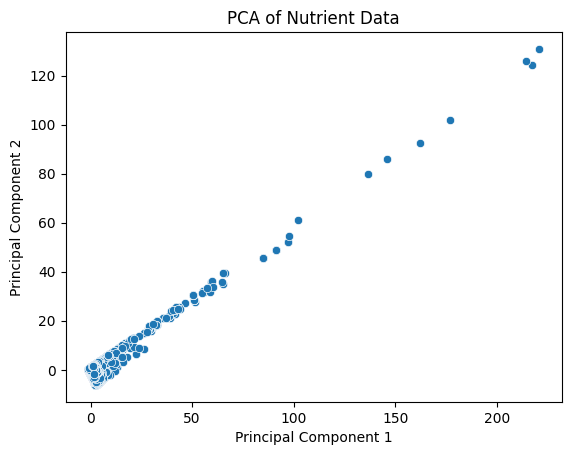

In [8]:
from sklearn.decomposition import PCA
import seaborn as sns

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(food_data[['Fiber, total dietary-G', 'Protein-G', 'Total lipid (fat)-G']].dropna())

# PCA Transformation
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_normalized)
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

# Visualizing the PCA result
sns.scatterplot(x='principal component 1', y='principal component 2', data=principal_df)
plt.title('PCA of Nutrient Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [9]:
# Assuming 'Energy-KCAL' is the column for calories
food_data['Nutrient Density Score'] = (food_data['Fiber, total dietary-G'] + food_data['Protein-G']) / food_data['Energy-KCAL']
high_density_foods = food_data.sort_values(by='Nutrient Density Score', ascending=False).head(10)
print(high_density_foods[['description', 'Nutrient Density Score']])


                                               description  \
1176361  STEVIA EXTRACT WITH WHITE CLOVER HONEY LIQUID ...   
530623          LIME TWISTS SPARKLING WATER BEVERAGE, LIME   
327244                              YELLOW MUSTARD, YELLOW   
1214115                     STEAK RUB SEASONING, STEAK RUB   
1214103                        PICKLED JALAPENOS & CARROTS   
530626                     PURIFIED WATER BEVERAGE, ORANGE   
530625   SPARKLING WATER BEVERAGE WITH OTHER NATURAL FL...   
1568910  POMEGRANATE BLUEBERRY SPARKLING WATER BEVERAGE...   
530624                      PURIFIED WATER BEVERAGE, PEACH   
960606                         SPARKLING WATER, GRAPEFRUIT   

         Nutrient Density Score  
1176361                     inf  
530623                      inf  
327244                      inf  
1214115                     inf  
1214103                     inf  
530626                      inf  
530625                      inf  
1568910                     inf  
530624     

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Ensure all necessary columns are selected without missing values
data_for_model = food_data[['Protein-G', 'Total lipid (fat)-G', 'Sugars, total including NLEA-G', 'Energy-KCAL', 'Fiber, total dietary-G']].dropna()

# Create a binary target variable based on fiber content
data_for_model['High Fiber'] = (data_for_model['Fiber, total dietary-G'] > data_for_model['Fiber, total dietary-G'].median()).astype(int)

# Define features and target
X = data_for_model[['Protein-G', 'Total lipid (fat)-G', 'Sugars, total including NLEA-G', 'Energy-KCAL']]
y = data_for_model['High Fiber']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set and evaluate the model
predictions = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.893551490279136


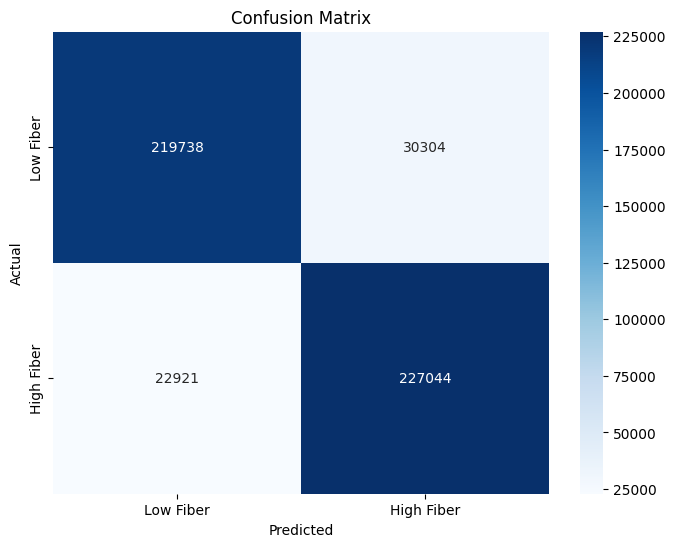

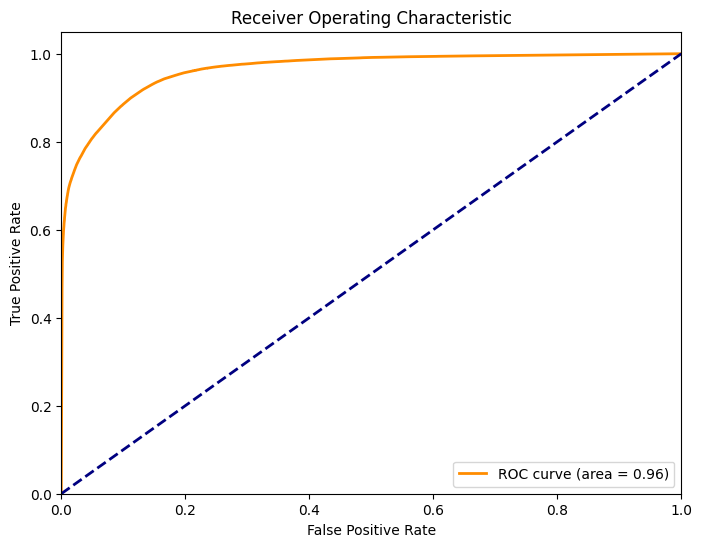

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


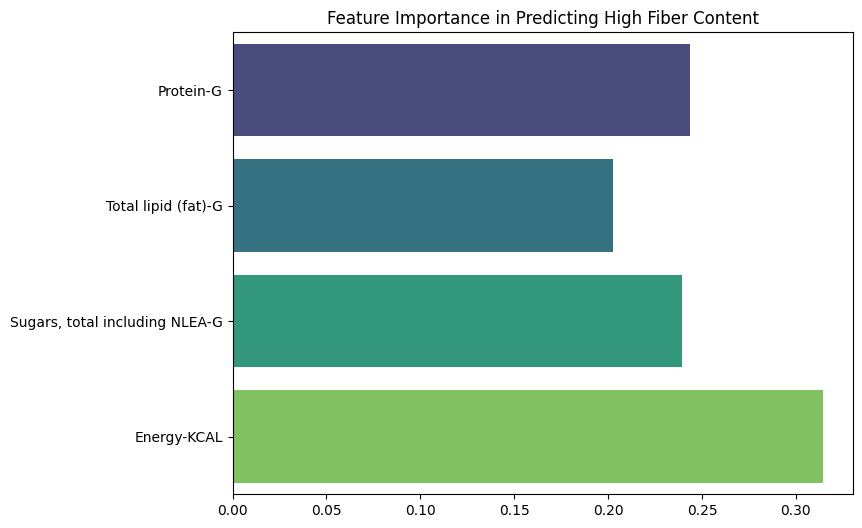

In [11]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Fiber', 'High Fiber'], yticklabels=['Low Fiber', 'High Fiber'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 3. Feature Importance
importance = clf.feature_importances_
features = ['Protein-G', 'Total lipid (fat)-G', 'Sugars, total including NLEA-G', 'Energy-KCAL']
plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=features, palette='viridis')
plt.title('Feature Importance in Predicting High Fiber Content')
plt.show()
